In [26]:
import pandas as pd
import seaborn as sns

In [17]:
!ls data

14_5_2021.csv   alex_hours_csv/             heart_rate_by_sleep_score.csv
18_5_2021.json  heart_rate-2020-09-25.json  sleep_score.csv


In [18]:
hr = pd.read_csv('data/sleep_score.csv')

In [19]:
hr

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,32203289647,2021-05-17T08:29:00Z,82,20,20,42,89,65,0.130719
1,32187445655,2021-05-16T09:58:00Z,84,22,20,42,101,65,0.127985
2,32175779755,2021-05-15T11:26:00Z,88,23,19,46,107,64,0.108957
3,32162580675,2021-05-14T08:30:00Z,79,17,22,40,53,67,0.102439
4,32151329206,2021-05-13T10:09:00Z,84,22,20,42,84,66,0.122534
...,...,...,...,...,...,...,...,...,...
230,29021954162,2020-09-25T09:15:30Z,83,21,17,45,86,65,0.130237
231,29009750612,2020-09-24T08:37:30Z,77,22,15,40,106,63,0.155189
232,28995520522,2020-09-23T05:14:30Z,70,21,15,34,47,64,0.178905
233,28982235712,2020-09-22T07:52:30Z,69,21,18,30,55,64,0.136164


In [20]:
hr.iloc[:-5,0]

0      32203289647
1      32187445655
2      32175779755
3      32162580675
4      32151329206
          ...     
225    29111758226
226    29099957287
227    29056912929
228    29046356548
229    29033564406
Name: sleep_log_entry_id, Length: 230, dtype: int64

In [21]:
hr.loc[(hr.overall_score >= 85) & (hr.resting_heart_rate > 70)]

,sleep_log_entry_id,timestamp,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
58,31408874943,2021-03-20T10:40:00Z,89,22,20,47,92,72,0.110390
177,29779224099,2020-11-21T12:29:30Z,88,22,21,45,105,71,0.113537


In [22]:
print(hr.overall_score.median())
print(hr.overall_score.mean())

79.0
77.20425531914894


<h1>Find out what heart rates are the lowest for each sleep score.<h1>

In [23]:
hr2 = hr.groupby(['overall_score','resting_heart_rate']).agg([max], ascending=False).sort_index(ascending=False)
hr2

sleep_log_entry_id             timestamp  \
                                                max                   max   
overall_score resting_heart_rate                                            
90            65                        31012846107  2021-02-16T09:55:00Z   
89            72                        31408874943  2021-03-20T10:40:00Z   
              66                        31126195810  2021-02-28T11:10:00Z   
88            71                        29779224099  2020-11-21T12:29:30Z   
              70                        31474855702  2021-03-23T08:30:00Z   
...                                             ...                   ...   
59            65                        30271552721  2020-12-28T03:46:00Z   
52            71                        29737294348  2020-11-18T04:18:30Z   
              68                        31183907786  2021-03-03T07:37:30Z   
51            65                        30099227278  2020-12-16T04:02:00Z   
              63                        30407494226  2021-01-09T07:26:30Z   

                                 composition_score revitalization_score  \
                                               max                  max   
overall_score resting_heart_rate                                          
90            65                                23                   21   
89            72                                22                   20   
              66                                23                   19   
88            71                                22                   21   
              70                                23                   20   
...                                            ...                  ...   
59            65                                16                   15   
52            71                                16                   14   
              68                                21                   12   
51            65                                12                   12   
              63                                15                   17   

                                 duration_score deep_sleep_in_minutes  \
                                            max                   max   
overall_score resting_heart_rate                                        
90            65                             46                   115   
89            72                             47                    92   
              66                             47                   119   
88            71                             45                   105   
              70                             46                   122   
...                                         ...                   ...   
59            65                             28                    55   
52            71                             22                    62   
              68                             19                    41   
51            65                             27                    30   
              63                             19                    35   

                                 restlessness  
                                          max  
overall_score resting_heart_rate               
90            65                     0.083739  
89            72                     0.110390  
              66                     0.129447  
88            71                     0.113537  
              70                     0.154639  
...                                       ...  
59            65                     0.103774  
52            71                     0.152542  
              68                     0.229299  
51            65                     0.114286  
              63                     0.138229  

[153 rows x 7 columns]

In [24]:
hr2.to_csv('data/heart_rate_by_sleep_score.csv')

<h1>Scatter Plot Showing Relationship of Resting Heart Rate to Sleep Score</h1>

<AxesSubplot:xlabel='resting_heart_rate', ylabel='overall_score'>

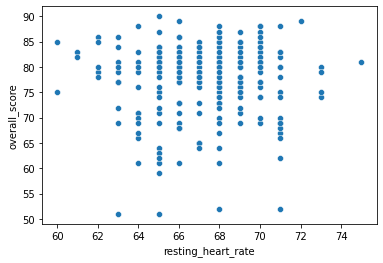

In [29]:
sns.scatterplot(y=hr['overall_score'], x=hr['resting_heart_rate'])

<h3>Maybe we can get a better understanding of the relationship by making a regression line</h3>

<AxesSubplot:xlabel='resting_heart_rate', ylabel='overall_score'>

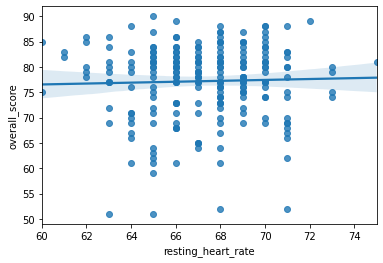

In [30]:
sns.regplot(y=hr['overall_score'], x=hr['resting_heart_rate'])